<a href="https://colab.research.google.com/github/Junswhandy/2024-js-challenge/blob/main/Analisis%20Kepuasan%20Mahasiswa%20(SEM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
 !pip install semopy
# library untuk sem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 4.0 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659681 sha256=bcd82062dae44f79d3cc63bbd36ae433942e872e87e03b494ef0c8827625d8fd
  Stored in directory: /root/.cache/pip/wheels/d2/9a/31/fae291ff6a649bad125037eef8c7cc63d8c542e14bdcccea37
Successfully built semopy


In [ ]:
!pip install semopy --upgrade

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from google.colab import files

# **1. Upload File**
uploaded = files.upload()

# **2. Baca File yang Diupload**
filename = list(uploaded.keys())[0]
df = pd.read_excel(filename)  # Membaca file sebagai DataFrame



Saving kuesionerPenelitiaanFix.xlsx to kuesionerPenelitiaanFix.xlsx


In [ ]:
# **3. Cek Struktur Data**
print("\nInformasi Data:")
print(df.info())

In [ ]:
# **4. Cek Data Kosong**
print("\nJumlah Data Kosong per Kolom:")
print(df.isnull().sum())


Jumlah Data Kosong per Kolom:
Timestamp                                                                                                                                                                       0
NIM                                                                                                                                                                             0
ANGKATAN                                                                                                                                                                        0
JURUSAN                                                                                                                                                                         0
JENIS KELAMIN                                                                                                                                                                   0
Bagaimana pendapat anda dengan proses pengurusan dokumen akademik (transkrip ni

In [ ]:
# **5. Encoding untuk Berbagai Skala Likert**
likert_mappings = {
    "Sangat Puas": 4, "Puas": 3, "Tidak Puas": 2, "Sangat Tidak Puas": 1,
    "Sangat Sering": 4, "Sering": 3, "Jarang": 2, "Tidak Pernah": 1,
    "Sangat Memadai": 4, "Memadai": 3, "Tidak Memadai": 2, "Sangat Tidak Memadai": 1,
    "Sangat Setuju": 4, "Setuju": 3, "Tidak Setuju": 2, "Sangat Tidak Setuju": 1,
    "Sangat Mungkin": 4, "Mungkin": 3, "Tidak Mungkin": 2, "Sangat Tidak Mungkin": 1
}

# Menghapus kolom yang tidak diperlukan sebelumnya
df_cleaned = df.drop(columns=["Timestamp", "NIM", "Apakah ada hal lain yang ingin Anda sampaikan mengenai layanan administrasi akademik ( kritik dan saran dipersilahkan) ?"])

# Mengonversi data kategorikal ke numerik dengan mengganti nilai-nilai dari skala Likert
df_encoded = df_cleaned.replace(likert_mappings)

# **6. Cek Hasil Encoding**
print("\nPreview Data Setelah Encoding:")
print(df_encoded.head())

# **7. Simpan Data yang Sudah Di-encode**
df_encoded.to_csv("data_encoded.csv", index=False)
print("\nData telah disimpan sebagai 'data_encoded.csv'")




Preview Data Setelah Encoding:
   ANGKATAN             JURUSAN JENIS KELAMIN  \
0      2024  Teknik Informatika     Perempuan   
1      2020  Teknik Informatika     Perempuan   
2      2021  Teknik Informatika     Laki-Laki   
3      2021    Sistem Informasi     Perempuan   
4      2021  Teknik Informatika     Laki-Laki   

   Bagaimana pendapat anda dengan proses pengurusan dokumen akademik (transkrip nilai, nilai semester, permohonan cuti akademik) ?  \
0                                                  3                                                                                 
1                                                  4                                                                                 
2                                                  3                                                                                 
3                                                  3                                                                                 
4  

<ipython-input-4-83425d36a2ee>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_cleaned.replace(likert_mappings)


In [ ]:
df_cleaned

In [ ]:
df

In [ ]:
# Cek tipe data dan distribusi
print("\nTipe Data Setelah Encoding:")
print(df_encoded.dtypes)

print("\nDistribusi Nilai Setiap Kolom:")
print(df_encoded.describe())


# Evaluasi Model Pengukuran (Measurement Model)

In [ ]:
# Menghapus kolom yang tidak diperlukan untuk uji validitas
df = df_encoded.drop(columns=['ANGKATAN', 'JURUSAN', 'JENIS KELAMIN','Seberapa sering anda mengalami kesulitan dalam pengurusan administrasi akademik (misalnya KRS, pengajuan dokumen, pembayaran)?',  'Seberapa sering anda merasa perlu untuk mengajukan keluhan terkait layanan administrasi akademik?'])

# Cek hasil setelah penghapusan kolom
print("\nPreview Data Setelah Menghapus Kolom:")


# Menyimpan data yang sudah dibersihkan
df.to_csv("data.csv", index=False)
print("\nData telah disimpan sebagai 'data.csv'")



Preview Data Setelah Menghapus Kolom:

Data telah disimpan sebagai 'data.csv'


In [ ]:
import pandas as pd
df = pd.read_csv('data_encoded.csv')
df.to_excel('data_encoded_clean.xlsx', index=False)
from google.colab import files
files.download('data_encoded_clean.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PROSES MAPPING DATA SUPAYA MENJADI LEBIH SINGKAT

In [ ]:
# Mapping nama kolom panjang ke nama variabel pendek
column_mapping = {
    "Bagaimana pendapat anda dengan proses pengurusan dokumen akademik (transkrip nilai, nilai semester, permohonan cuti akademik) ?": "KPA1",
    "Bagaimana pendapat  anda terhadap informasi yang diberikan mengenai proses administrasi semester selanjutnya (Pembayaran BPP, penginputan KRS)?": "KPA2",
    "Bagaimana pendapat anda dengan ketepatan waktu dalam proses pengajuan surat atau permintaan dokumen di administrasi akademik?": "KPA3",
    "Bagaimana pendapat anda dengan kelancaran proses administrasi akademik yang telah anda lakukan?": "KPA4",
    "Bagaimana pendapat anda dengan kecepatan staf administrasi akademik dalam merespon pertanyaan atau permohonan yang anda berikan?": "KPA5",
    "Bagaimana pendapat anda dengan kemudahan dalam menemui staf akademik jika membutuhkan bantuan terkait administrasi akademik?": "KPA6",
    "Bagaimana pendapat anda dengan cara staf administrasi akademik menangani masalah atau keluhan yang anda berikan terkait administrsi akademik?": "KPA7",
    "Bagaimana pendapat anda dengan tingkat profesionalisme staf administrasi akademik dalam menghadapi mahasiswa?": "KPA8",
    "Bagaimana pendapat anda dengan pelayanan yang diberikan oleh staf administrasi akademik?": "KPA9",
    "Bagaimana pendapat anda dengan kemudahan penggunaan sistem informasi akademik (SISKA)?": "KPA10",
    "Bagaimana pendapat anda dengan ketersediaan informasi terkait akademik (jadwal, pengumuman, nilai) yang jelas di SISKA?": "KPA11",
    "Bagaimana pendapat anda dengan kelancaran proses untuk mengecek jadwal, nilai, kartu rencana studi, dan pengisian formulir melalui SISKA?": "KPA12",
    "Bagaimana pendapat dengan kecepatan respons sistem informasi akademik (SISKA) saat diakses pada waktu puncak (misalnya saat pengisian KRS, awal semester, akhir semester)?": "KPA13",
    "Bagaimana pendapat  anda dengan tingkat transparansi dalam komunikasi mengenai kebijakan atau perubahan yang berlaku di administrasi akademik?": "KPA16",
    "Bagaimana pendapat anda dengan efisiensi dan efektivitas layanan administrasi akademik yang telah anda terima?": "KPA14",
    "Bagaimana Anda menilai penanganan keluhan yang Anda ajukan terkait administrasi akademik?": "KPA15",

    "Bagaimana pendapat anda dengan layanan administrasi akademik secara keseluruhan?": "KM1",
    "Seberapa besar kemungkinan Anda akan merekomendasikan Universitas DIPA Makassar kepada orang lain berdasarkan layanan akademik yang Anda terima? ": "KM2",
    "Bagaimana menurut Anda mengenai kemudahan akses informasi dan layanan akademik yang tersedia sehingga Anda merasa nyaman dalam proses perkuliahan?": "KM4",
    "Sejauh mana Anda percaya bahwa Universitas DIPA Makassar menyediakan layanan akademik yang baik? ": "KM3"
}
# Ganti nama kolom dalam DataFrame
df.rename(columns=column_mapping, inplace=True)

# Tampilkan nama kolom setelah diganti
print(df.columns)


Index(['KPA1', 'KPA2', 'KPA3', 'KPA4', 'KPA5', 'KPA6', 'KPA7', 'KPA8', 'KPA9',
       'KPA10', 'KPA11', 'KPA12', 'KPA13', 'KM1', 'KPA16', 'KPA14', 'KPA15',
       'KM2', 'KM4', 'KM3'],
      dtype='object')


## Uji Validitas dan Reliabilitas

### Outer Loadings, CR dan AVE

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from semopy import Model

# 1. Standarisasi Data (untuk melakukan standar terhadap data, supaya rentang data tidak terlalu jauh)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df),
                               columns=df.columns,
                               index=df.index)

# model sem, hubungaan antara variabel dengan indikator
model_desc = """
Kualitas_Pelayanan_Akademik =~ 0.8*KPA1 +KPA2 + KPA3 + KPA4 + KPA5 + KPA6 + KPA7 + KPA8 + KPA9 + KPA10 + KPA11 + KPA12 + KPA13  + KPA14 + KPA15
Kepuasan_Mahasiswa =~ 0.75*KM1 + KM2 + KM3
Kepuasan_Mahasiswa ~ Kualitas_Pelayanan_Akademik
"""

# 3. Create and Fit the Model
model = Model(model_desc)
model.fit(df_standardized)

# Tampilkan hasil
print(model.inspect())

# 4. Inspect Results
std_estimates = model.inspect(std_est=True)



# 5. Hitung AVE dan CR untuk Setiap Konstruk Laten
latent_vars = ["Kualitas_Pelayanan_Akademik", "Kepuasan_Mahasiswa"]

if "lval" not in std_estimates.columns or "Estimate" not in std_estimates.columns:
    print("Peringatan: Data hasil estimasi tidak memiliki kolom yang diperlukan.")
    print(std_estimates)  # Debugging
    exit()

for latent_var in latent_vars:
    current_loadings = std_estimates.loc[std_estimates['lval'] == latent_var, 'Estimate'].tolist()

    if not current_loadings:
        print(f"Peringatan: Tidak ditemukan outer loadings untuk {latent_var}. AVE dan CR tidak dihitung.")
        print(f"Pastikan nama variabel laten di model_desc sesuai dengan nama kolom di dataframe.")
        print(f"Outer loadings dataframe:\n{std_estimates}")  # Debugging
        continue

    squared_loadings = [x**2 for x in current_loadings]  # Mengkuadratkan outer loadings
    error_variance = [1 - x**2 for x in current_loadings]  # Menghitung error variance

    # Menghitung AVE
    AVE = sum(squared_loadings) / len(squared_loadings)

    # Menghitung CR
    CR = (sum(current_loadings) ) / ( (sum(current_loadings)) + (sum(error_variance)))

    print(f"\n{latent_var}:")
    print(f"  AVE = {AVE:.3f}")
    print(f"  CR = {CR:.3f}")

    # Interpretasi AVE dan CR
    print(f"  AVE: {'✓ Memenuhi kriteria (≥ 0.50)' if AVE >= 0.50 else '✗ Tidak memenuhi kriteria (< 0.50)'}")
    print(f"  CR: {'✓ Memenuhi kriteria (≥ 0.70)' if CR >= 0.70 else '✗ Tidak memenuhi kriteria (< 0.70)'}")




                           lval  op                         rval  \
0            Kepuasan_Mahasiswa   ~  Kualitas_Pelayanan_Akademik   
1                          KPA1   ~  Kualitas_Pelayanan_Akademik   
2                          KPA2   ~  Kualitas_Pelayanan_Akademik   
3                          KPA3   ~  Kualitas_Pelayanan_Akademik   
4                          KPA4   ~  Kualitas_Pelayanan_Akademik   
5                          KPA5   ~  Kualitas_Pelayanan_Akademik   
6                          KPA6   ~  Kualitas_Pelayanan_Akademik   
7                          KPA7   ~  Kualitas_Pelayanan_Akademik   
8                          KPA8   ~  Kualitas_Pelayanan_Akademik   
9                          KPA9   ~  Kualitas_Pelayanan_Akademik   
10                        KPA10   ~  Kualitas_Pelayanan_Akademik   
11                        KPA11   ~  Kualitas_Pelayanan_Akademik   
12                        KPA12   ~  Kualitas_Pelayanan_Akademik   
13                        KPA13   ~  Kualitas_Pe

### Cronbach’s Alpha

In [ ]:
import pingouin as pg

# Daftar indikator sesuai dengan model
cols = ["KPA1", "KPA2", "KPA3", "KPA4", "KPA5", "KPA6", "KPA7",
        "KPA9", "KPA10", "KPA11", "KPA12", "KPA13", "KPA14", "KPA15"]

# Filter hanya kolom yang ada di DataFrame
valid_cols = [col for col in cols if col in df_standardized.columns]

# Pastikan minimal ada 2 indikator untuk menghitung Alpha
if len(valid_cols) >= 2:
    alpha, _ = pg.cronbach_alpha(df_standardized[valid_cols])
    print(f"Cronbach’s Alpha: {alpha:.3f}")
else:
    print(f"Peringatan: Tidak cukup indikator untuk menghitung Cronbach’s Alpha (ditemukan: {len(valid_cols)})")


Cronbach’s Alpha: 0.950


In [ ]:
import pingouin as pg

# Daftar indikator sesuai dengan model
cols = ["KM1" , "KM2" , "KM3"]

# Filter hanya kolom yang ada di DataFrame
valid_cols = [col for col in cols if col in df_standardized.columns]

# Pastikan minimal ada 2 indikator untuk menghitung Alpha
if len(valid_cols) >= 2:
    alpha, _ = pg.cronbach_alpha(df_standardized[valid_cols])
    print(f"Cronbach’s Alpha: {alpha:.3f}")
else:
    print(f"Peringatan: Tidak cukup indikator untuk menghitung Cronbach’s Alpha (ditemukan: {len(valid_cols)})")


Cronbach’s Alpha: 0.814


### Fornell-Larcker Criterion

In [ ]:
import numpy as np
import pandas as pd

def fornell_larcker(ave, correlation_matrix):
    """
    Menghitung kriteria Fornell-Larcker.

    Parameters:
    ave (dict): Dictionary yang berisi AVE untuk setiap konstruk.
    correlation_matrix (pd.DataFrame): DataFrame korelasi antar konstruk.

    Returns:
    pd.DataFrame: Matriks Fornell-Larcker.
    """
    constructs = list(ave.keys())
    fornell_matrix = pd.DataFrame(index=constructs, columns=constructs)

    for i in constructs:
        for j in constructs:
            if i == j:
                fornell_matrix.loc[i, j] = np.sqrt(ave[i])  # akar kuadrat AVE di diagonal
            else:
                fornell_matrix.loc[i, j] = correlation_matrix.loc[i, j]  # Korelasi antar konstruk

    return fornell_matrix

# Contoh Data: AVE untuk setiap konstruk
ave_values = {
    "Kepuasan_Mahasiswa": 0.745,
    "Kualitas_Pelayanan_Akademik": 0.894,
}


# Get correlation from existing correlation_matrix DataFrame
correlation_data = df_standardized[['Kepuasan_Mahasiswa', 'Kualitas_Pelayanan_Akademik']].corr()
#correlation_data = correlation_matrix # Assuming correlation_matrix is already calculated

# Konversi ke DataFrame using the existing correlation_matrix
#correlation_matrix = pd.DataFrame(correlation_data, index=correlation_data.keys()) # Assuming correlation_matrix is already calculated
correlation_matrix = correlation_data
# Hitung Fornell-Larcker Criterion
fornell_result = fornell_larcker(ave_values, correlation_matrix)

# Tampilkan hasil
print("Fornell-Larcker Criterion:")
print(fornell_result)

### Heterotrait-Monotrait Ratio (HTMT)

In [ ]:
import pandas as pd
import pingouin as pg

# Misalkan df_standardized adalah DataFrame yang sudah distandardisasi
# Data indikator sesuai dengan model
# Indikator untuk Kepuasan Mahasiswa
kepuasan_mahasiswa = ["KM1", "KM2", "KM3"]
# Indikator untuk Kualitas Pelayanan Akademik
kualitas_pelayanan_akademik = ["KPA1", "KPA2", "KPA3", "KPA4", "KPA5", "KPA6", "KPA7",
                               "KPA9", "KPA10", "KPA11", "KPA12", "KPA13", "KPA14", "KPA15"]

# Filter hanya kolom yang ada di DataFrame
valid_cols_kepuasan = [col for col in kepuasan_mahasiswa if col in df_standardized.columns]
valid_cols_pelayanan = [col for col in kualitas_pelayanan_akademik if col in df_standardized.columns]

# Memastikan ada cukup indikator
if len(valid_cols_kepuasan) >= 2 and len(valid_cols_pelayanan) >= 2:
    # Matriks korelasi antar indikator
    correlation_matrix = df_standardized[valid_cols_kepuasan + valid_cols_pelayanan].corr()

    # Menampilkan matriks korelasi antar konstruk
    print("Matriks Korelasi Antar Indikator:")
    print(correlation_matrix)

    # Heterotrait-Monotrait Ratio (HTMT) antara konstruk
    # Menghitung korelasi antar konstruk
    htmt_kepuasan = 0
    htmt_pelayanan = 0
    count_kepuasan = 0
    count_pelayanan = 0

    # Menghitung rata-rata korelasi antar indikator dalam Kepuasan Mahasiswa
    for col1 in valid_cols_kepuasan:
        for col2 in valid_cols_kepuasan:
            if col1 != col2:
                htmt_kepuasan += correlation_matrix.loc[col1, col2]
                count_kepuasan += 1

    # Menghitung rata-rata korelasi antar indikator dalam Kualitas Pelayanan Akademik
    for col1 in valid_cols_pelayanan:
        for col2 in valid_cols_pelayanan:
            if col1 != col2:
                htmt_pelayanan += correlation_matrix.loc[col1, col2]
                count_pelayanan += 1

    # Rata-rata korelasi untuk setiap konstruk
    htmt_kepuasan /= count_kepuasan
    htmt_pelayanan /= count_pelayanan

    # Heterotrait-Monotrait Ratio (HTMT) antar konstruk
    htmt_value = 0
    count = 0

    # Menghitung HTMT antar konstruk
    for col1 in valid_cols_kepuasan:
        for col2 in valid_cols_pelayanan:
            htmt_value += correlation_matrix.loc[col1, col2]
            count += 1

    # Rata-rata HTMT antar konstruk
    htmt_value /= count

    # Menampilkan hasil
    print(f"\nHTMT untuk Kepuasan Mahasiswa: {htmt_kepuasan:.3f}")
    print(f"HTMT untuk Kualitas Pelayanan Akademik: {htmt_pelayanan:.3f}")
    print(f"Heterotrait-Monotrait Ratio (HTMT) antara Konstruk Kepuasan Mahasiswa dan Kualitas Pelayanan Akademik: {htmt_value:.3f}")

else:
    print(f"Peringatan: Tidak cukup indikator untuk menghitung HTMT (ditemukan: Kepuasan Mahasiswa = {len(valid_cols_kepuasan)}, Kualitas Pelayanan Akademik = {len(valid_cols_pelayanan)})")


Matriks Korelasi Antar Indikator:
            KM1       KM2       KM3      KPA1      KPA2      KPA3      KPA4  \
KM1    1.000000  0.547234  0.560404  0.718401  0.695875  0.735102  0.734353   
KM2    0.547234  1.000000  0.670546  0.452028  0.527125  0.463154  0.554018   
KM3    0.560404  0.670546  1.000000  0.487088  0.528411  0.422970  0.544167   
KPA1   0.718401  0.452028  0.487088  1.000000  0.653207  0.678319  0.647767   
KPA2   0.695875  0.527125  0.528411  0.653207  1.000000  0.611563  0.584546   
KPA3   0.735102  0.463154  0.422970  0.678319  0.611563  1.000000  0.708260   
KPA4   0.734353  0.554018  0.544167  0.647767  0.584546  0.708260  1.000000   
KPA5   0.698991  0.514542  0.492904  0.579532  0.543050  0.705734  0.663931   
KPA6   0.726671  0.504622  0.485602  0.564035  0.606273  0.680772  0.610847   
KPA7   0.755288  0.505969  0.547736  0.657582  0.548314  0.632579  0.747085   
KPA9   0.762284  0.492635  0.558164  0.622976  0.582420  0.670382  0.704561   
KPA10  0.595363  0

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from semopy import Model, calc_stats



# # 2️⃣ Standarisasi Data
# scaler = StandardScaler()
# df_standardized = pd.DataFrame(scaler.fit_transform(df),
#                                columns=df.columns,
#                                index=df.index)

# # 3️⃣ Definisikan Model SEM
# model_desc = """
# Kualitas_Pelayanan_Akademik =~ 0.8*KPA1 + KPA2 + KPA3 + KPA4 + KPA5 + KPA6 + KPA7 + KPA9 + KPA10 + KPA13 + KPA14
# Kepuasan_Mahasiswa =~ 0.75*KM1 + KM5 + KM7
# Kepuasan_Mahasiswa ~ Kualitas_Pelayanan_Akademik
# """

# # 3. Create and Fit the Model
# model = Model(model_desc)
# model.fit(df_standardized)

# # 5️⃣ Cek Parameter Model
# print("\n🔹 Parameter Model:")
# print(model.inspect('parameters'))

# # 6️⃣ Cek Goodness-of-Fit Indices
# try:
#     fit_indices = calc_stats(model)  # Menggunakan calc_stats
#     print("\n🔹 Goodness-of-Fit Indices:")
#     print(fit_indices)
# except Exception as e:
#     print("\n⚠️ ERROR saat menghitung Goodness-of-Fit Indices:")
#     print(e)

# # 7️⃣ Debugging Tambahan: Cek Matriks Model



### Analisis faktor

In [ ]:
pip install factor-analyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42623 sha256=2d5ea9baca7a4dcaebf39e7f2272a7ea61da4a214b560c3c28baad22f9cb3ceb
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor-analyzer


In [ ]:
import pandas as pd
from factor_analyzer import FactorAnalyzer



# Cek KMO Measure of Sampling Adequacy (MSA)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
print(f"KMO Score: {kmo_model}")  # Ideal KMO > 0.6

# Exploratory Factor Analysis (EFA) dengan 2 faktor
fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(df)

# Faktor Loading
loadings = pd.DataFrame(fa.loadings_, index=df.columns, columns=["Faktor 1", "Faktor 2"])
print("Factor Loadings:\n", loadings)


KMO Score: 0.9572531810793311
Factor Loadings:
        Faktor 1  Faktor 2
KPA1   0.591139  0.503230
KPA2   0.538748  0.511929
KPA3   0.703638  0.394184
KPA4   0.674764  0.480035
KPA5   0.732914  0.328225
KPA6   0.720090  0.366566
KPA7   0.765160  0.381455
KPA8   0.784852  0.325650
KPA9   0.823597  0.322318
KPA10  0.389166  0.662672
KPA11  0.313960  0.709875
KPA12  0.261556  0.789188
KPA13  0.400871  0.711378
KM1    0.755133  0.482211
KPA16  0.668581  0.490395
KPA14  0.501548  0.537505
KPA15  0.402768  0.526960
KM2    0.368876  0.592370
KM4    0.356558  0.691856
KM3    0.397514  0.609108


/usr/local/lib/python3.11/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Matriks Korelasi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data Anda
data = df_standardized

# Hitung matriks korelasi
correlation_matrix = data.corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# Evaluasi Model Struktural (Structural Model)

## Collinearity Diagnosis

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Misalnya, df_standardized adalah DataFrame yang sudah distandarisasi dengan variabel independen

# Tambahkan konstanta untuk intercept dalam model VIF
X = add_constant(df_standardized)

# Hitung VIF untuk setiap variabel
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Menghitung rata-rata VIF untuk KPA dan KM
kpa_vif = vif_data[vif_data["Variable"].str.startswith("KPA")]["VIF"].mean()
km_vif = vif_data[vif_data["Variable"].str.startswith("KM")]["VIF"].mean()

# Menambahkan rata-rata KPA dan KM ke dalam DataFrame
vif_data.loc[len(vif_data)] = ["KPA (Avg)", kpa_vif]
vif_data.loc[len(vif_data)] = ["KM (Avg)", km_vif]

# Menampilkan hasil VIF
print("Variance Inflation Factor (VIF) untuk setiap variabel:")
print(vif_data)


Variance Inflation Factor (VIF) untuk setiap variabel:
     Variable       VIF
0       const  1.000000
1        KPA1  2.866662
2        KPA2  2.538423
3        KPA3  3.756129
4        KPA4  3.830714
5        KPA5  3.030235
6        KPA6  3.134184
7        KPA7  4.132606
8        KPA8  3.860010
9        KPA9  4.214563
10      KPA10  3.151243
11      KPA11  2.870593
12      KPA12  2.994575
13      KPA13  3.156892
14        KM1  4.689383
15      KPA16  3.468003
16      KPA14  2.788099
17      KPA15  2.009867
18        KM2  2.406580
19        KM4  3.008097
20        KM3  2.901228
21  KPA (Avg)  3.237675
22   KM (Avg)  3.251322


In [ ]:
print(model.inspect(std_est=True).columns)


Index(['lval', 'op', 'rval', 'Estimate', 'Est. Std', 'Std. Err', 'z-value',
       'p-value'],
      dtype='object')


## Koefisien Jalur (Path Coefficient)

In [ ]:
import pandas as pd
import numpy as np
from semopy import Model

# Cek apakah semua kolom numerik
df = df.apply(pd.to_numeric, errors='coerce')  # Ubah semua ke numerik, NaN jika gagal

# Cek apakah ada NaN setelah konversi
if df.isnull().sum().sum() > 0:
    print("WARNING: Ada NaN dalam dataset! Periksa kembali data input.")

# Definisi model SEM

model_path = """
Kualitas_Pelayanan_Akademik =~ 0.7*KPA1 +KPA2 + KPA3 + KPA4 + KPA5 + KPA6 + KPA7 + KPA8 + KPA9 + KPA10 + KPA11 + KPA12 + KPA13  + KPA14 + KPA15
Kepuasan_Mahasiswa =~ 0.9*KM1 + KM2 + KM3
Kepuasan_Mahasiswa ~ Kualitas_Pelayanan_Akademik
"""


# Jalankan model SEM
model = Model(model_path)

try:
    model.fit(df_standardized)
    print("✅ Model berhasil dijalankan tanpa error!")
except Exception as e:
    print(f"❌ Error saat menjalankan model: {e}")

# Ambil hasil estimasi dari model SEM
try:
    results = model.inspect(std_est=True)

    # Cek kolom yang tersedia
    print("Kolom yang tersedia dalam hasil inspect():")
    print(results.columns)

    # Pastikan kolom untuk Standard Error (SE) benar
    se_column = "Std. Err" if "Std. Err" in results.columns else "Est. Std"

    # Konversi kolom ke float untuk menghindari error
    results["Estimate"] = pd.to_numeric(results["Estimate"], errors="coerce")
    results[se_column] = pd.to_numeric(results[se_column], errors="coerce")

    # Hitung Confidence Interval (CI)
    results["CI Lower"] = results["Estimate"] - 1.96 * results[se_column]
    results["CI Upper"] = results["Estimate"] + 1.96 * results[se_column]

    # Tampilkan hasil
    print("Path Confidence Interval (CI) untuk Variabel Laten:")
    print(results[["lval", "rval", "Estimate", "CI Lower", "CI Upper"]])

except KeyError as ke:
    print(f"KeyError: {ke} - Pastikan kolom yang dicari ada dalam output model!")
except Exception as e:
    print(f"Error lain: {e}")


✅ Model berhasil dijalankan tanpa error!
Kolom yang tersedia dalam hasil inspect():
Index(['lval', 'op', 'rval', 'Estimate', 'Est. Std', 'Std. Err', 'z-value',
       'p-value'],
      dtype='object')
Path Confidence Interval (CI) untuk Variabel Laten:
                           lval                         rval      Estimate  \
0            Kepuasan_Mahasiswa  Kualitas_Pelayanan_Akademik  8.899656e-01   
1                          KPA1  Kualitas_Pelayanan_Akademik  7.000000e-01   
2                          KPA2  Kualitas_Pelayanan_Akademik  6.630615e-01   
3                          KPA3  Kualitas_Pelayanan_Akademik  7.167030e-01   
4                          KPA4  Kualitas_Pelayanan_Akademik  7.529735e-01   
5                          KPA5  Kualitas_Pelayanan_Akademik  7.058276e-01   
6                          KPA6  Kualitas_Pelayanan_Akademik  7.080169e-01   
7                          KPA7  Kualitas_Pelayanan_Akademik  7.554321e-01   
8                          KPA8  Kualitas_Pel

## Uji R2 dan Q2

In [ ]:
import numpy as np

# Ambil indikator untuk masing-masing faktor laten
indicators_kpa = ["KPA1", "KPA2", "KPA3", "KPA4", "KPA5", "KPA6", "KPA7", "KPA8", "KPA9", "KPA10", "KPA11", "KPA12", "KPA13", "KPA14", "KPA15"]
indicators_km = ["KM1", "KM2", "KM3"]

# Hitung skor laten sebagai rata-rata indikatornya
df_standardized["Kualitas_Pelayanan_Akademik"] = df_standardized[indicators_kpa].mean(axis=1)
df_standardized["Kepuasan_Mahasiswa"] = df_standardized[indicators_km].mean(axis=1)

print(df_standardized[["Kualitas_Pelayanan_Akademik", "Kepuasan_Mahasiswa"]].head())


   Kualitas_Pelayanan_Akademik  Kepuasan_Mahasiswa
0                    -0.046070           -0.072085
1                     0.561755            0.445739
2                    -0.046070           -0.072085
3                    -0.330831           -0.072085
4                    -0.046070           -0.072085


### R Square

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Model regresi untuk menghitung R²
X = df_standardized[["Kualitas_Pelayanan_Akademik"]]
y = df_standardized["Kepuasan_Mahasiswa"]

# Jumlah sampel (n) dan jumlah variabel independen (k)
n = X.shape[0]  # Jumlah baris (sampel)
k = X.shape[1]  # Jumlah prediktor

# Buat model regresi
model_reg = LinearRegression()
model_reg.fit(X, y)
y_pred = model_reg.predict(X)

# Hitung R²
r_squared = r2_score(y, y_pred)

# Hitung Adjusted R²
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

# Tampilkan hasil
print(f"R² (Koefisien Determinasi) = {r_squared:.3f}")
print(f"Adjusted R² = {adjusted_r_squared:.3f}")


R² (Koefisien Determinasi) = 0.724
Adjusted R² = 0.723


### Q Square

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut
import numpy as np

# Model regresi untuk menghitung R²
X = df_standardized[["Kualitas_Pelayanan_Akademik"]]
y = df_standardized["Kepuasan_Mahasiswa"]

# Jumlah sampel (n) dan jumlah variabel independen (k)
n = X.shape[0]  # Jumlah baris (sampel)
k = X.shape[1]  # Jumlah prediktor

# Buat model regresi
model_reg = LinearRegression()
model_reg.fit(X, y)
y_pred = model_reg.predict(X)

# Hitung R²
r_squared = r2_score(y, y_pred)

# Hitung Adjusted R²
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

# Q² menggunakan metode Leave-One-Out Cross Validation (LOO-CV)
loo = LeaveOneOut()
y_actual, y_predicted = [], []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_reg.fit(X_train, y_train)
    y_pred_loo = model_reg.predict(X_test)

    y_actual.append(y_test.values[0])
    y_predicted.append(y_pred_loo[0])

# Hitung Q²
ss_residual = np.sum((np.array(y_actual) - np.array(y_predicted))**2)
ss_total = np.sum((y - y.mean())**2)
q_squared = 1 - (ss_residual / ss_total)

# Tampilkan hasil

# print(f"Adjusted Q² = {adjusted_r_squared:.3f}")
print(f"Q² (Predictive Relevance) = {q_squared:.3f}")


KeyError: "None of [Index(['Kualitas_Pelayanan_Akademik'], dtype='object')] are in the [columns]"

# Pengujian Hipotesis

In [ ]:
import pandas as pd
import numpy as np
from semopy import Model

# Definisi model SEM

model_path = """
Kualitas_Pelayanan_Akademik =~ 0.8*KPA1 +KPA2 + KPA3 + KPA4 + KPA5 + KPA6 + KPA7 + KPA8 + KPA9 + KPA10 + KPA11 + KPA12 + KPA13  + KPA14 + KPA15
Kepuasan_Mahasiswa =~ 0.75*KM1 + KM2 + KM3
Kepuasan_Mahasiswa ~ Kualitas_Pelayanan_Akademik
"""


# Jalankan Model
model = Model(model_path)
model.fit(df_standardized)

# Ambil semua hasil estimasi tanpa filter dulu
summary = model.inspect(std_est=True)

# Tampilkan hasil sebelum filtering
print("\n=== Hasil Asli dari model.inspect() ===")
print(summary)

# Pastikan kolom yang dibutuhkan ada
expected_cols = ["lval", "rval", "Estimate", "Std. Err", "p-value"]
missing_cols = [col for col in expected_cols if col not in summary.columns]
if missing_cols:
    print(f"\n⚠️  Kolom hilang dalam output: {missing_cols}")

# Filter hanya hubungan yang diinginkan
summary = summary[["lval", "rval", "Estimate", "Std. Err", "p-value"]].copy()

# Pastikan semua kolom numerik untuk menghindari error
summary["Estimate"] = pd.to_numeric(summary["Estimate"], errors="coerce")
summary["Std. Err"] = pd.to_numeric(summary["Std. Err"], errors="coerce")
summary["p-value"] = pd.to_numeric(summary["p-value"], errors="coerce")

# Hitung t-statistic jika Std. Err ada
summary["t-statistic"] = summary["Estimate"] / summary["Std. Err"]

# Ubah nama kolom agar lebih rapi
summary.rename(columns={
    "lval": "Variabel Independen",
    "rval": "Variabel Dependen",
    "Estimate": "Koefisien Jalur (β)",
    "Std. Err": "Standard Error",
    "p-value": "p-value"
}, inplace=True)

# **PASTIKAN URUTAN YANG BENAR**
# Sekarang filter dengan urutan yang benar
summary = summary[
    (summary["Variabel Independen"] == "Kualitas_Pelayanan_Akademik") &
    (summary["Variabel Dependen"] == "Kepuasan_Mahasiswa")
]

# Reset index agar rapi
summary.reset_index(drop=True, inplace=True)

# Tampilkan hasil akhir
print("\n=== Hasil Akhir Setelah Filter ===")
print(summary)



=== Hasil Asli dari model.inspect() ===
                           lval  op                         rval  \
0            Kepuasan_Mahasiswa   ~  Kualitas_Pelayanan_Akademik   
1                          KPA1   ~  Kualitas_Pelayanan_Akademik   
2                          KPA2   ~  Kualitas_Pelayanan_Akademik   
3                          KPA3   ~  Kualitas_Pelayanan_Akademik   
4                          KPA4   ~  Kualitas_Pelayanan_Akademik   
5                          KPA5   ~  Kualitas_Pelayanan_Akademik   
6                          KPA6   ~  Kualitas_Pelayanan_Akademik   
7                          KPA7   ~  Kualitas_Pelayanan_Akademik   
8                          KPA8   ~  Kualitas_Pelayanan_Akademik   
9                          KPA9   ~  Kualitas_Pelayanan_Akademik   
10                        KPA10   ~  Kualitas_Pelayanan_Akademik   
11                        KPA11   ~  Kualitas_Pelayanan_Akademik   
12                        KPA12   ~  Kualitas_Pelayanan_Akademik   
13     

In [ ]:
import pandas as pd
import numpy as np
from semopy import Model

# Definisi model SEM
model_desc = """
Kepuasan_Mahasiswa =~ 0.75*KM1 + KM2 + KM3
Kualitas_Pelayanan_Akademik =~ 0.8*KPA1 + KPA2 + KPA3 + KPA4 + KPA5 + KPA6 + KPA7 + KPA8 + KPA9 + KPA10 + KPA11 + KPA12 + KPA13 + KPA14 + KPA15
Kepuasan_Mahasiswa ~ Kualitas_Pelayanan_Akademik
"""

# Jalankan Model
model = Model(model_desc)
model.fit(df_standardized)

# hasil estimasi
summary = model.inspect(std_est=True)[["lval", "rval", "Std. Err", "p-value", "z-value"]]

# Daftar indikator untuk setiap variabel laten
indikator = {
    "Kepuasan_Mahasiswa": ["KM1", "KM2", "KM3"],
    "Kualitas_Pelayanan_Akademik": ["KPA1", "KPA2", "KPA3", "KPA4", "KPA5",
                                    "KPA6", "KPA7", "KPA8", "KPA9", "KPA10",
                                    "KPA11", "KPA12", "KPA13", "KPA14", "KPA15"]
}
# Hitung Standard Deviation dari indikator
std_dev_values = {col: df[col].std() for col in df.columns}

# Fungsi untuk mendapatkan standard deviation variabel independen
def get_std_laten(var):
    if var in indikator:
        return np.nanmean([std_dev_values.get(ind, np.nan) for ind in indikator[var]])
    return std_dev_values.get(var, np.nan)


summary["Standard Deviation"] = summary["lval"].apply(get_std_laten)


summary.rename(columns={
    "lval": "Variabel Dependen",
    "rval": "Variabel Independen",
    "Std. Err": "Standard Error",
    "z-value": "t-statistic",
    "p-value": "p-value",
    "Standard Deviation": "Standard Deviation"
}, inplace=True)


filtered_summary = summary[
    (summary["Variabel Independen"].isin(["Kepuasan_Mahasiswa", "Kualitas_Pelayanan_Akademik"])) |
    (summary["Variabel Dependen"].isin(["Kepuasan_Mahasiswa", "Kualitas_Pelayanan_Akademik"]))
]
# Tampilkan hasil yang sudah difilter
print(filtered_summary)


              Variabel Dependen          Variabel Independen Standard Error  \
0            Kepuasan_Mahasiswa  Kualitas_Pelayanan_Akademik       0.084292   
1                           KM1           Kepuasan_Mahasiswa              -   
2                           KM2           Kepuasan_Mahasiswa       0.050466   
3                           KM3           Kepuasan_Mahasiswa       0.049497   
4                          KPA1  Kualitas_Pelayanan_Akademik              -   
5                          KPA2  Kualitas_Pelayanan_Akademik       0.066762   
6                          KPA3  Kualitas_Pelayanan_Akademik       0.065466   
7                          KPA4  Kualitas_Pelayanan_Akademik       0.064523   
8                          KPA5  Kualitas_Pelayanan_Akademik       0.065738   
9                          KPA6  Kualitas_Pelayanan_Akademik       0.065687   
10                         KPA7  Kualitas_Pelayanan_Akademik       0.064454   
11                         KPA8  Kualitas_Pelayanan_

# Goodness Of Fit

In [ ]:
import pandas as pd
import numpy as np
import semopy

# Definisi Model SEM
model_sea = """
Kualitas_Pelayanan_Akademik =~ KPA1 +KPA2  + KPA4 + KPA5 + KPA6  + KPA8  + KPA10
Kepuasan_Mahasiswa =~ KM1  + KM3
Kepuasan_Mahasiswa ~ Kualitas_Pelayanan_Akademik
"""

# Membuat model SEM
model = semopy.Model(model_sea)

# Melatih model
model.fit(df_standardized)

# Mendapatkan hasil estimasi parameter
estimates = model.inspect()

# Menghitung Goodness-of-Fit Indices
gof = semopy.calc_stats(model)


# Menampilkan hasil
# print("\n=== Hasil Estimasi Parameter ===\n", estimates)
print("\n=== Goodness-of-Fit Indices ===")
print(f"Chi-Square: {gof.loc['Value', 'chi2']:.4f}, p-value: {gof.loc['Value', 'chi2 p-value']:.4f}")
print(f"RMSEA: {gof.loc['Value', 'RMSEA']:.4f}")
print(f"CFI: {gof.loc['Value', 'CFI']:.4f}")
print(f"TLI (NNFI): {gof.loc['Value', 'TLI']:.4f}")
print(f"AIC: {gof.loc['Value', 'AIC']:.4f}, BIC: {gof.loc['Value', 'BIC']:.4f}")



=== Goodness-of-Fit Indices ===
Chi-Square: 53.7310, p-value: 0.0011
RMSEA: 0.0732
CFI: 0.9770
TLI (NNFI): 0.9682
AIC: 37.4627, BIC: 100.1307


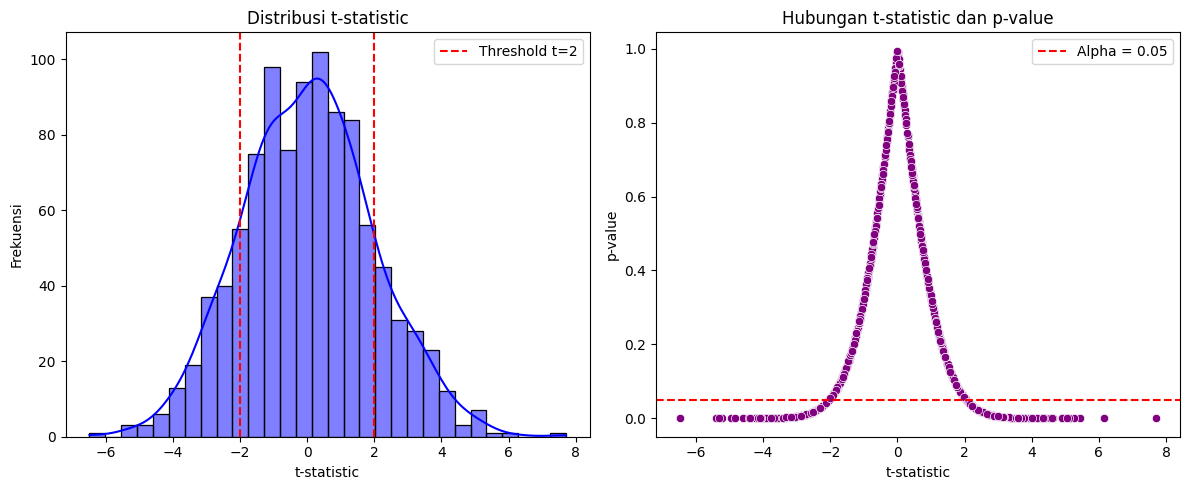

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

# Simulasi data t-statistic dan p-value
np.random.seed(42)
t_stats = np.random.normal(loc=0, scale=2, size=1000)  # Simulasi t-statistic
p_values = 2 * (1 - t.cdf(abs(t_stats), df=30))  # Hitung p-value

# Membuat DataFrame
df = pd.DataFrame({'t-statistic': t_stats, 'p-value': p_values})

# Plot Distribusi t-statistic
plt.figure(figsize=(12, 5))

# Histogram t-statistic
plt.subplot(1, 2, 1)
sns.histplot(df['t-statistic'], bins=30, kde=True, color='blue')
plt.axvline(x=2, color='red', linestyle='--', label='Threshold t=2')
plt.axvline(x=-2, color='red', linestyle='--')
plt.title('Distribusi t-statistic')
plt.xlabel('t-statistic')
plt.ylabel('Frekuensi')
plt.legend()

# Scatter Plot t-statistic vs p-value
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['t-statistic'], y=df['p-value'], color='purple')
plt.axhline(y=0.05, color='red', linestyle='--', label='Alpha = 0.05')
plt.title('Hubungan t-statistic dan p-value')
plt.xlabel('t-statistic')
plt.ylabel('p-value')
plt.legend()

plt.tight_layout()
plt.show()
